In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder


In [2]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_details = pd.read_csv('Car details v3.csv')
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
car_data_cdekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
car_data_cdekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
car_data.shape

(301, 9)

In [28]:
df1 = car_data[car_data.isna().any(axis=1)]
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [7]:
car_details.shape

(8128, 13)

In [8]:
car_data_cdekho.shape

(4340, 8)

In [9]:
car_details.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
car_details.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
car_details['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [12]:
car_details['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [13]:
len(car_details['name'].unique())

2058

In [16]:
car_details['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [17]:
car_details.loc[car_details['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.5 kmpl,1799 CC,139.46 bhp,174Nm@ 4300rpm,5.0


In [19]:
car_details['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [24]:
car_details['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

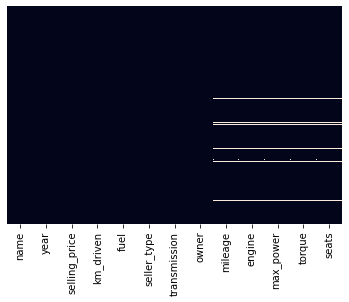

In [25]:
sns.heatmap(car_details.isnull(),yticklabels=False,cbar=False)

In [26]:
car_details.dropna(inplace=True)

In [27]:
car_details.shape

(7906, 13)

In [ ]:
#df1 = car_details[car_details.isna().any(axis=1)]

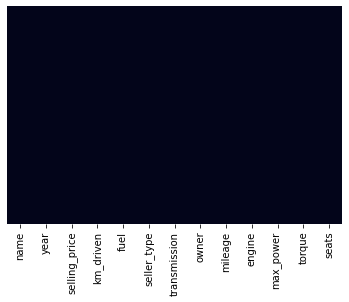

In [29]:
sns.heatmap(car_details.isnull(),yticklabels=False,cbar=False)

c:\users\i318517\desktop\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


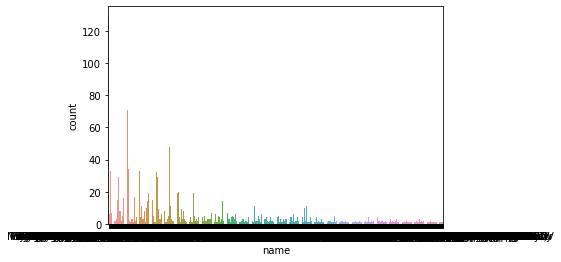

In [32]:
sns.countplot('name',data=car_details)
plt.show()

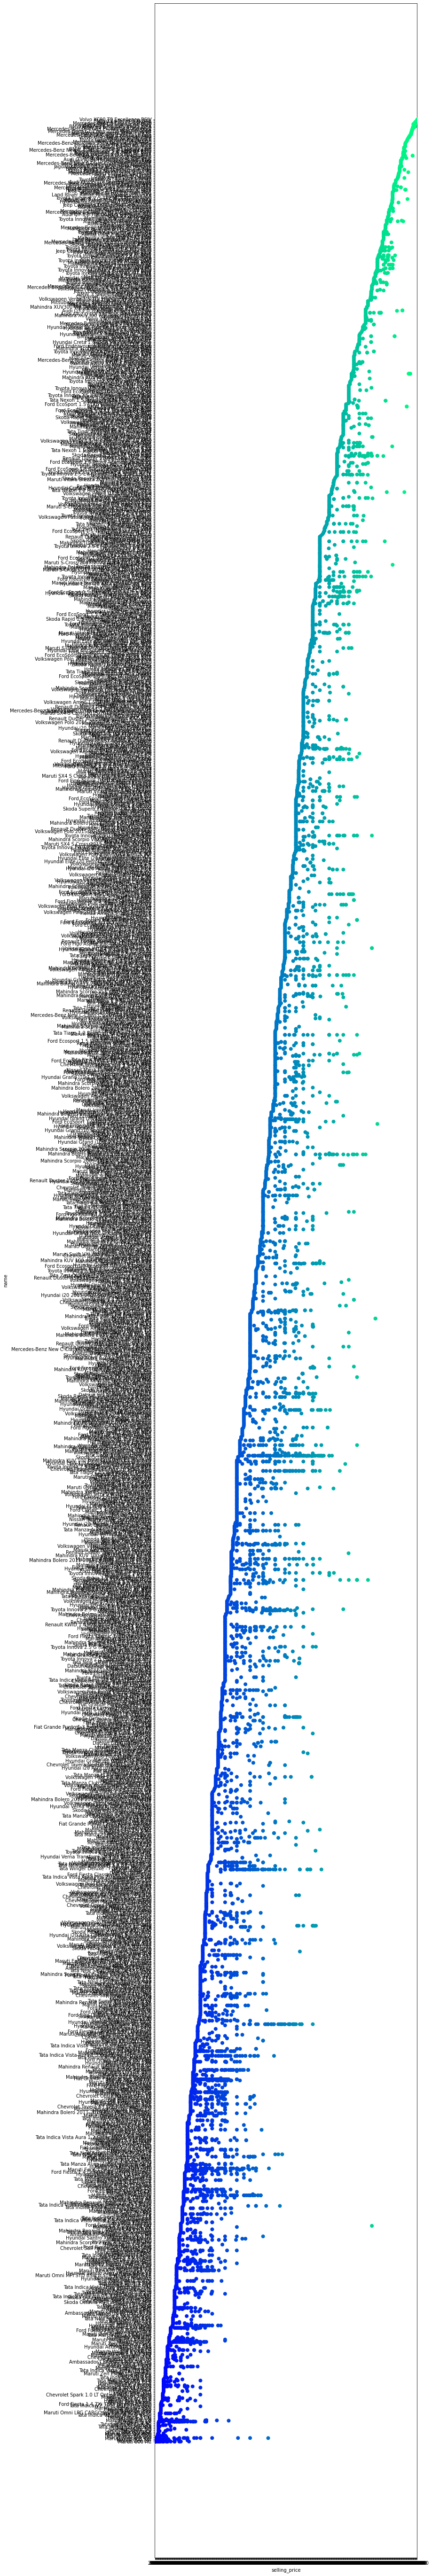

In [36]:
fig=plt.gcf()
fig.set_size_inches(10,100)
fig=sns.stripplot(x='selling_price',y='name',data=car_details,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

In [38]:
# do ordinal encoding for Name of the cards
ord_enc = OrdinalEncoder()
car_details['name_code'] = ord_enc.fit_transform(car_details[["name"]])
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0


In [39]:
car_details['year_code'] = 2021 - car_details['year']
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14


In [41]:
car_details['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [143]:
def split_name(names):
    lis = []
    for name in names:
        arr = name.split(' ')
        lis.append(arr[0])
    
    return lis
    

In [144]:
car_details['brand'] = split_name(car_details['name'])

In [146]:
car_details['brand'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: brand, dtype: int64

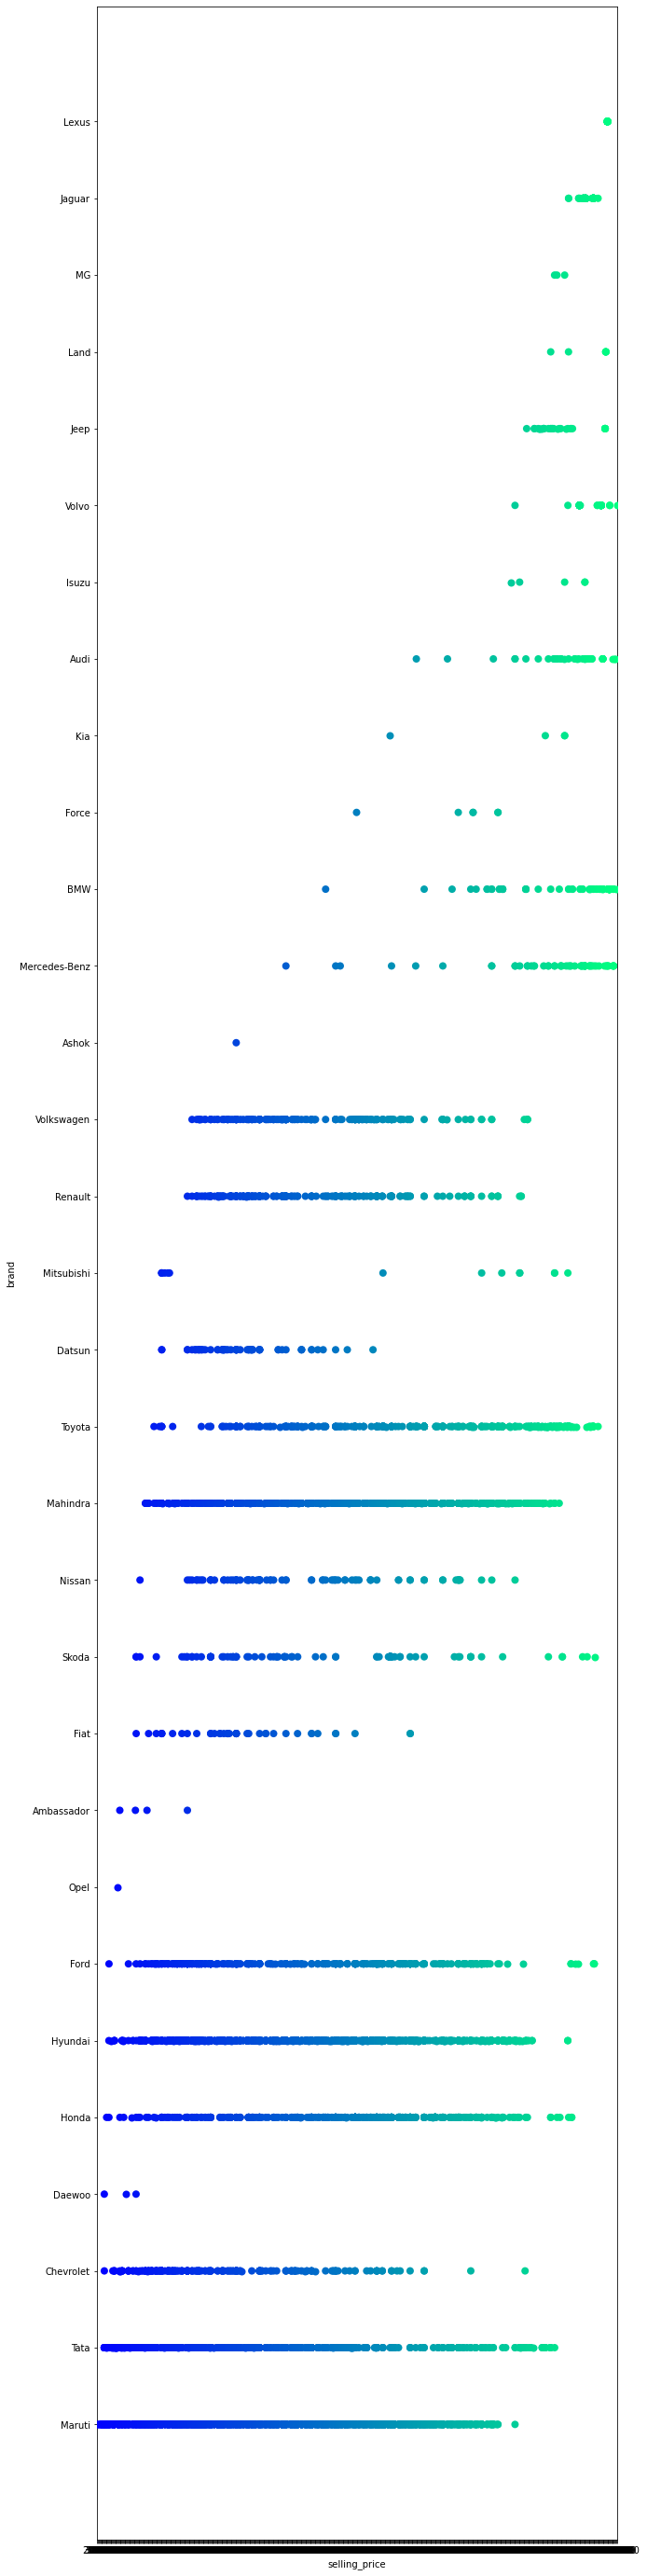

In [147]:
fig=plt.gcf()
fig.set_size_inches(10,50)
fig=sns.stripplot(x='selling_price',y='brand',data=car_details,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

In [145]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti


In [148]:
df = car_details.copy()
df.drop(['name','year'],axis=1,inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti


In [149]:

df['mileage_nu'] = df['mileage'].map(lambda x: x.rstrip('kmpl').rstrip('km/kg').rstrip())
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand,mileage_nu
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti,23.4
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda,21.14
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda,17.7
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai,23.0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti,16.1


In [150]:
df['engine_nu'] = df['engine'].map(lambda x: x.rstrip('CC').rstrip())
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand,mileage_nu,engine_nu
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti,23.4,1248
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda,21.14,1498
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda,17.7,1497
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai,23.0,1396
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti,16.1,1298


In [151]:
df['max_power_nu'] = df['max_power'].map(lambda x:x.rstrip('bhp').rstrip())
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand,mileage_nu,engine_nu,max_power_nu
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti,23.4,1248,74
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda,21.14,1498,103.52
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda,17.7,1497,78
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai,23.0,1396,90
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti,16.1,1298,88.2


In [152]:
df1 = df.copy()

In [153]:
#df1.drop(['mileage','engine','torque'],axis=1,inplace=True)
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand,mileage_nu,engine_nu,max_power_nu
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti,23.4,1248,74
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda,21.14,1498,103.52
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda,17.7,1497,78
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai,23.0,1396,90
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti,16.1,1298,88.2


In [169]:
df1.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
year_code          int64
mileage_nu       float64
engine_nu        float64
max_power_nu     float64
brand_code       float64
dtype: object

In [154]:
df1['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [155]:
df1['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [156]:
df1['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [157]:
df1['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [171]:
df1.drop(['mileage','engine','max_power','torque'],axis=1,inplace=True)
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,year_code,mileage_nu,engine_nu,max_power_nu,brand_code
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,7,74.00,74.00,74.00,20.0
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,7,103.52,103.52,103.52,26.0
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,15,78.00,78.00,78.00,10.0
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,11,90.00,90.00,90.00,11.0
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,14,88.20,88.20,88.20,20.0


In [160]:
# do ordinal encoding for Name of the cards
ord_enc = OrdinalEncoder()
df1['brand_code'] = ord_enc.fit_transform(df1[["brand"]])
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name_code,year_code,brand,mileage_nu,engine_nu,max_power_nu,brand_code
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1249.0,7,Maruti,23.4,1248,74,20.0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1546.0,7,Skoda,21.14,1498,103.52,26.0
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,375.0,15,Honda,17.7,1497,78,10.0
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,743.0,11,Hyundai,23.0,1396,90,11.0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1290.0,14,Maruti,16.1,1298,88.2,20.0


In [172]:
df1['brand_code'].value_counts()

20.0    2367
11.0    1360
19.0     758
27.0     719
10.0     466
28.0     452
9.0      388
4.0      230
25.0     228
29.0     185
3.0      118
26.0     104
23.0      81
13.0      71
30.0      67
6.0       65
21.0      54
7.0       41
2.0       40
17.0      34
14.0      31
22.0      14
16.0       6
8.0        6
12.0       5
15.0       4
0.0        4
5.0        3
18.0       3
24.0       1
1.0        1
Name: brand_code, dtype: int64

In [163]:
df1['mileage_nu'] = df1['mileage_nu'].map(lambda x: x.rstrip('kmpl').rstrip('km/kg').rstrip())

In [173]:

df1['max_power_nu'] = df1.max_power_nu.astype(float)
df1['engine_nu'] = df1.max_power_nu.astype(float)
df1['mileage_nu'] = df1.max_power_nu.astype(float)
#df1['max_power_nu'].astype(str).astype(float)
#df1['engine_nu'].astype(str).astype(float)
#df1['mileage_nu'].astype(str).astype(float)

In [174]:
df2 = pd.get_dummies(df1,drop_first=True)

In [175]:
df2.head()

,selling_price,km_driven,seats,year_code,mileage_nu,engine_nu,max_power_nu,brand_code,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,5.0,7,74.00,74.00,74.00,20.0,1,0,0,1,0,1,0,0,0,0
1,370000,120000,5.0,7,103.52,103.52,103.52,26.0,1,0,0,1,0,1,0,1,0,0
2,158000,140000,5.0,15,78.00,78.00,78.00,10.0,0,0,1,1,0,1,0,0,0,1
3,225000,127000,5.0,11,90.00,90.00,90.00,11.0,1,0,0,1,0,1,0,0,0,0
4,130000,120000,5.0,14,88.20,88.20,88.20,20.0,0,0,1,1,0,1,0,0,0,0


In [202]:
df2.dtypes


selling_price                     int64
km_driven                         int64
seats                           float64
year_code                         int64
mileage_nu                      float64
engine_nu                       float64
max_power_nu                    float64
brand_code                      float64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object

In [176]:
df2.corr()

,selling_price,km_driven,seats,year_code,mileage_nu,engine_nu,max_power_nu,brand_code,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.222158,0.041617,-0.412302,0.749674,0.749674,0.749674,-0.096519,0.204831,-0.035978,-0.195074,-0.386151,0.032779,-0.590269,-0.073601,-0.178786,0.116081,-0.115113
km_driven,-0.222158,1.000000,0.227259,0.428548,-0.038159,-0.038159,-0.038159,0.099116,0.271662,0.023095,-0.274460,0.202851,-0.083181,0.201186,0.089244,0.209913,-0.024168,0.148795
seats,0.041617,0.227259,1.000000,0.007923,0.191999,0.191999,0.191999,0.172441,0.354764,-0.028949,-0.345399,0.081197,-0.028106,0.072722,0.007845,0.033751,-0.010921,0.005175
year_code,-0.412302,0.428548,0.007923,1.000000,-0.226598,-0.226598,-0.226598,0.038812,-0.037536,0.059887,0.034351,0.243729,-0.100385,0.249002,0.205631,0.317328,-0.032661,0.271317
mileage_nu,0.749674,-0.038159,0.191999,-0.226598,1.000000,1.000000,1.000000,-0.077337,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
engine_nu,0.749674,-0.038159,0.191999,-0.226598,1.000000,1.000000,1.000000,-0.077337,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
max_power_nu,0.749674,-0.038159,0.191999,-0.226598,1.000000,1.000000,1.000000,-0.077337,0.304787,-0.060175,-0.286090,-0.286493,0.026493,-0.541870,-0.037283,-0.085206,0.049734,-0.054249
brand_code,-0.096519,0.099116,0.172441,0.038812,-0.077337,-0.077337,-0.077337,1.000000,0.108628,-0.021358,-0.109181,0.054038,0.062979,0.053056,-0.005462,0.017287,-0.031136,0.002806
fuel_Diesel,0.204831,0.271662,0.354764,-0.037536,0.304787,0.304787,0.304787,0.108628,1.000000,-0.072800,-0.978020,0.003567,-0.140763,0.025579,-0.009021,0.051721,-0.017362,-0.007567
fuel_LPG,-0.035978,0.023095,-0.028949,0.059887,-0.060175,-0.060175,-0.060175,-0.021358,-0.072800,1.000000,-0.059739,0.025092,-0.011697,0.025967,0.003946,0.013442,-0.001678,0.021268


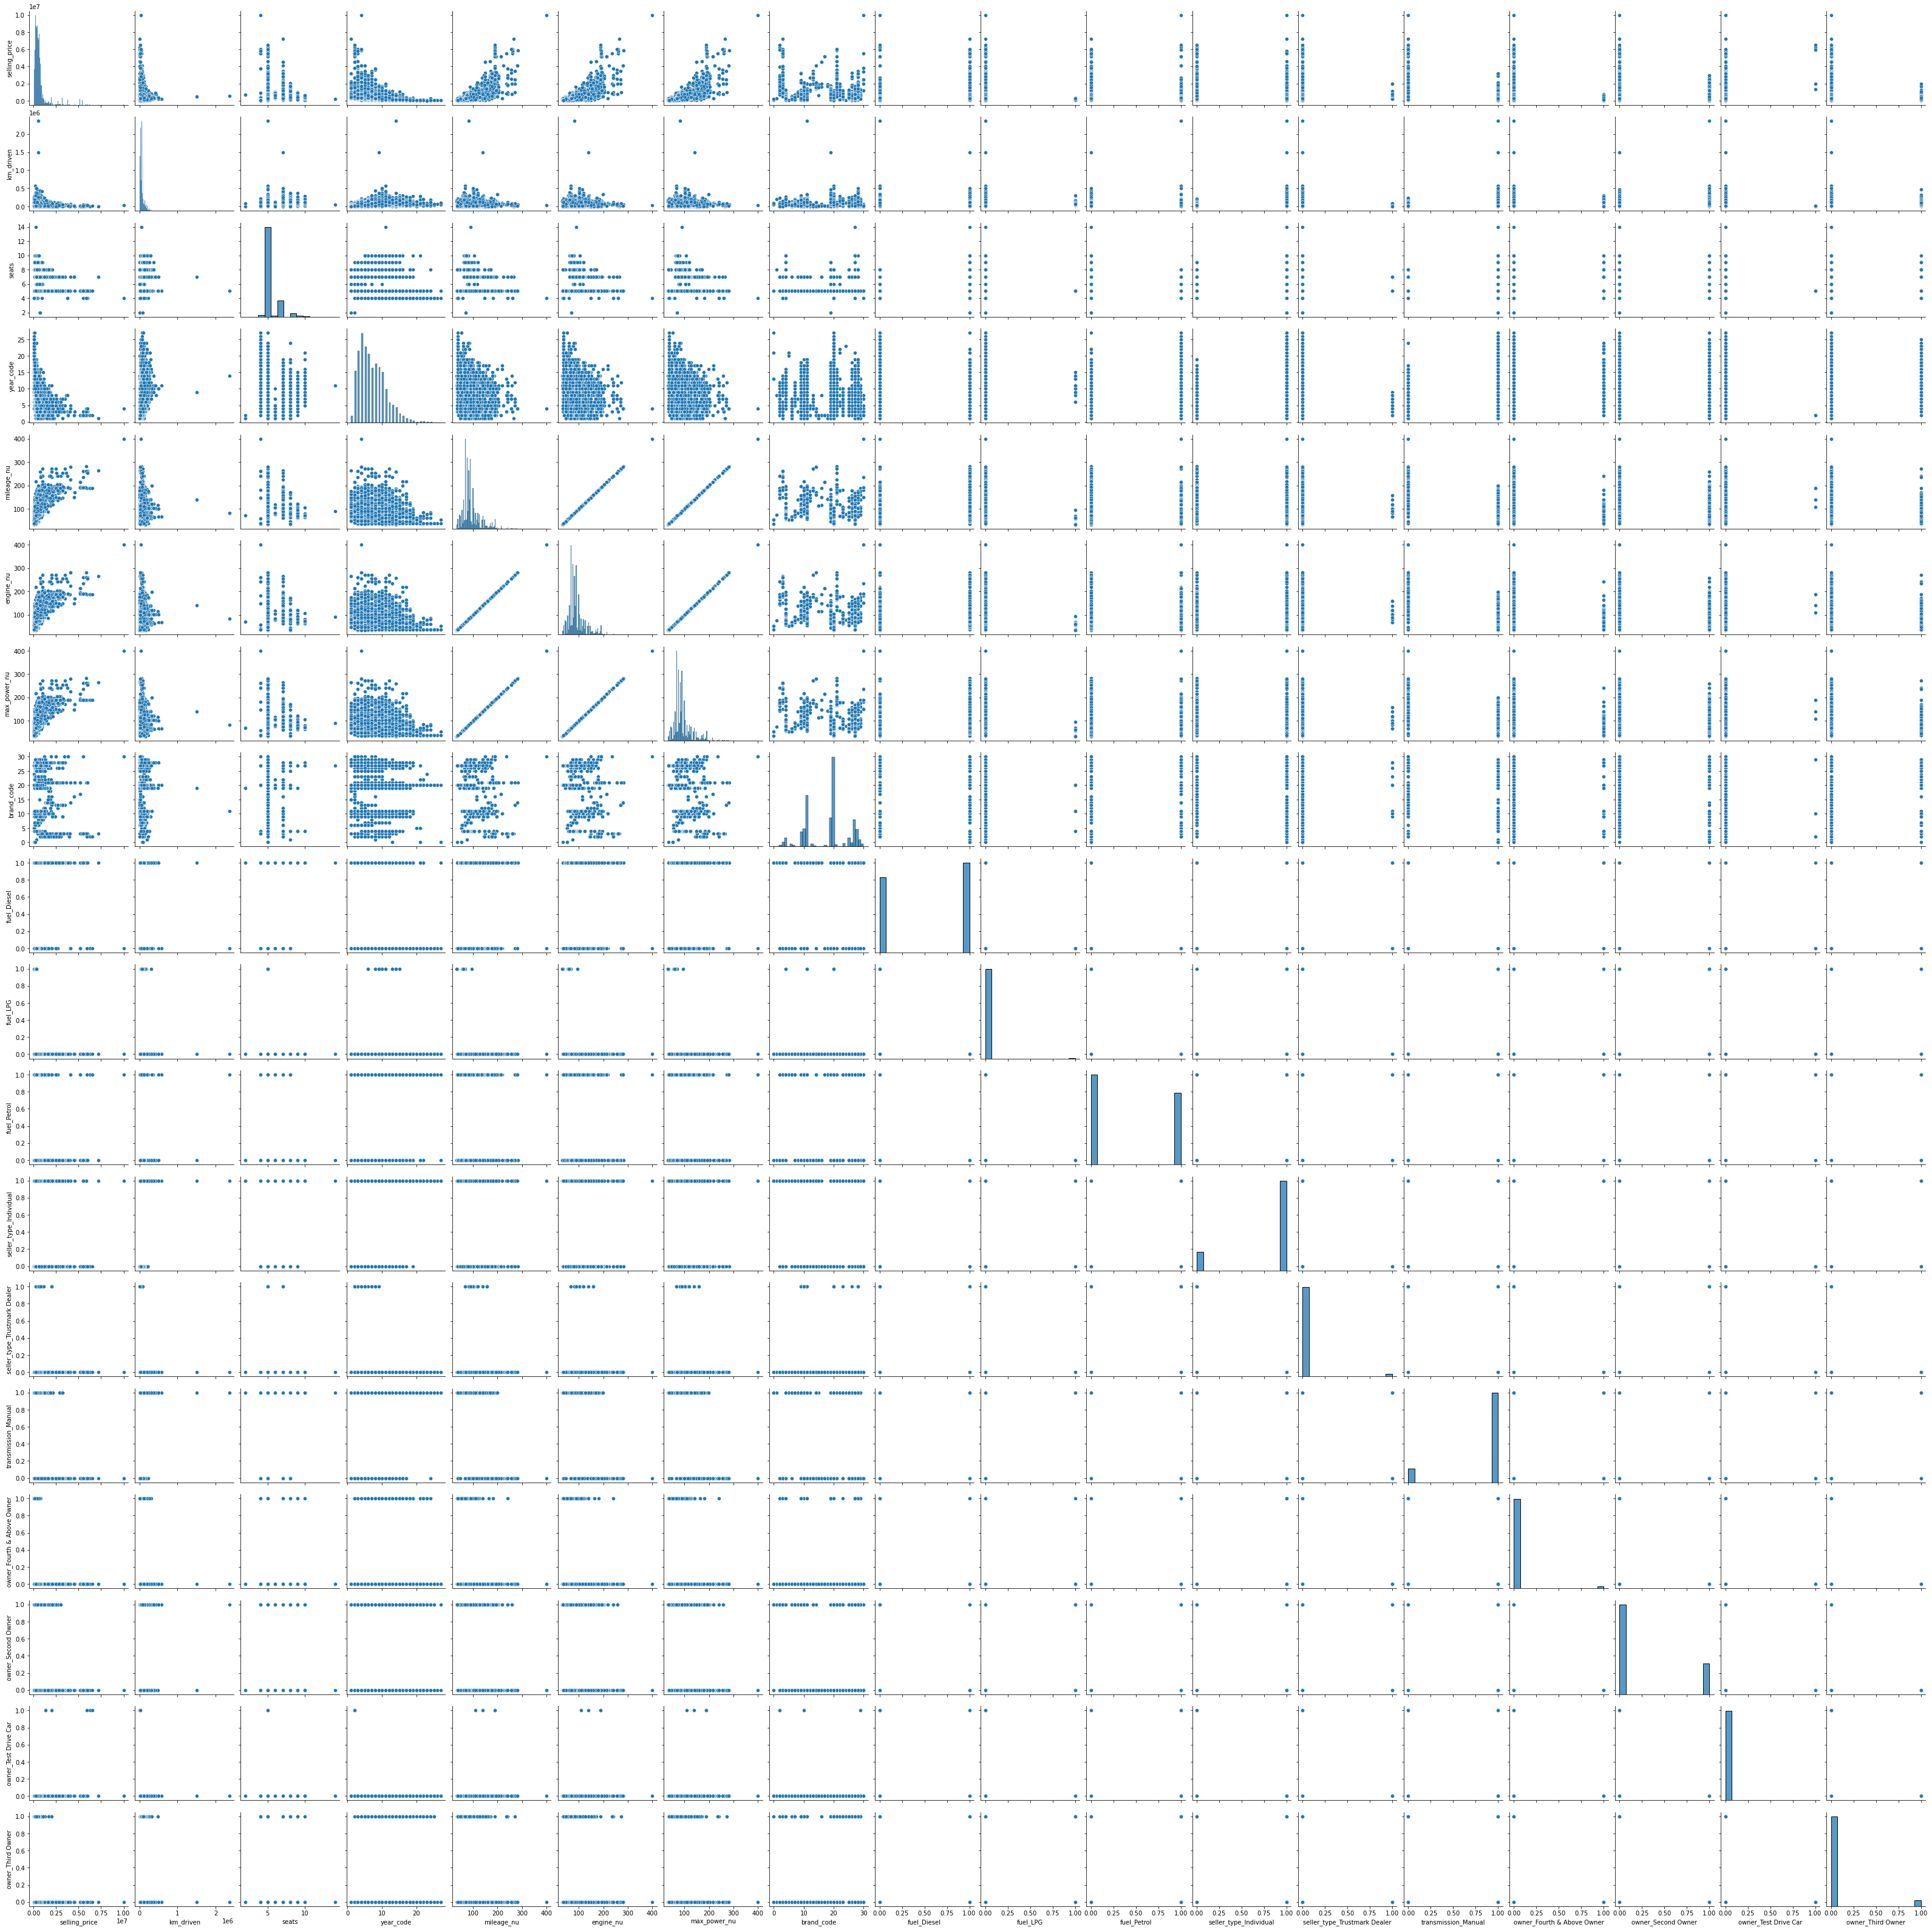

In [177]:
sns.pairplot(df2)

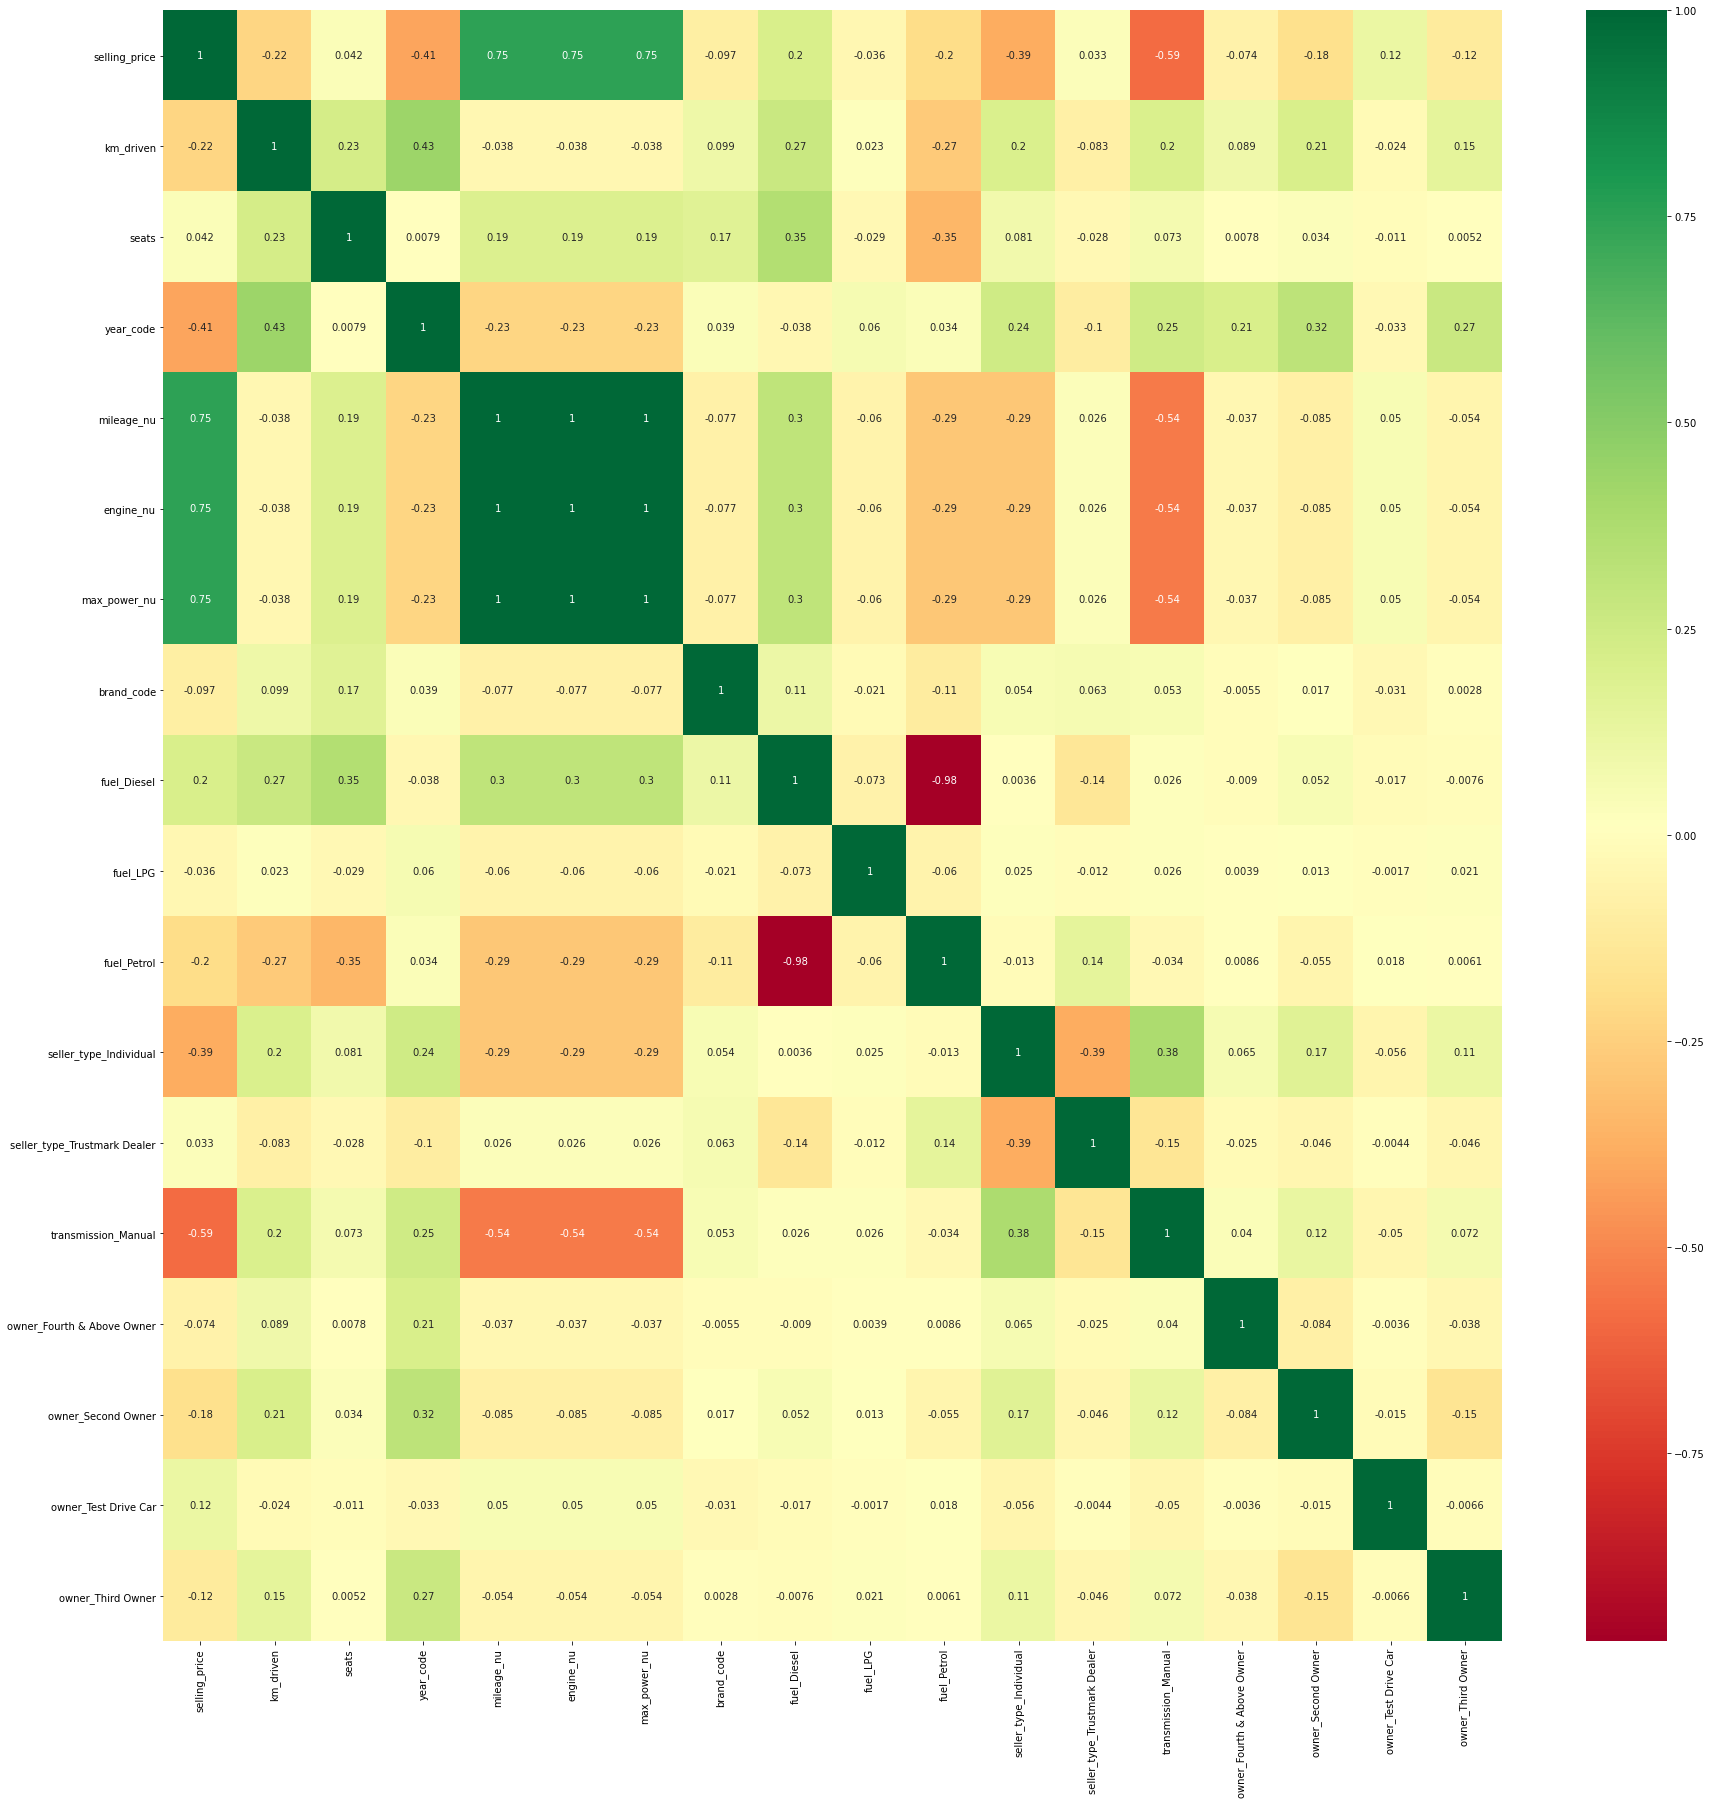

In [178]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g = sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [179]:
Y = df2['selling_price']
X = df2.drop(['selling_price'],axis=1)

In [180]:
X.head()

,km_driven,seats,year_code,mileage_nu,engine_nu,max_power_nu,brand_code,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,5.0,7,74.00,74.00,74.00,20.0,1,0,0,1,0,1,0,0,0,0
1,120000,5.0,7,103.52,103.52,103.52,26.0,1,0,0,1,0,1,0,1,0,0
2,140000,5.0,15,78.00,78.00,78.00,10.0,0,0,1,1,0,1,0,0,0,1
3,127000,5.0,11,90.00,90.00,90.00,11.0,1,0,0,1,0,1,0,0,0,0
4,120000,5.0,14,88.20,88.20,88.20,20.0,0,0,1,1,0,1,0,0,0,0


In [181]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [182]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [183]:
print(model.feature_importances_)

[3.59815309e-02 1.11335141e-02 1.47601692e-01 1.93506644e-01
 1.87786946e-01 1.37449428e-01 2.07387314e-02 1.51736139e-02
 6.34226002e-06 1.12492703e-02 1.80159631e-02 7.73130184e-04
 2.04967526e-01 2.39906346e-04 1.25295365e-02 2.07694941e-03
 7.69274570e-04]


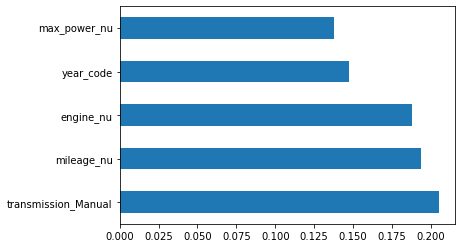

In [184]:
#plot graph of feature importances for better visualisation
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [188]:
X_test.shape

(1582, 17)

In [189]:
# randomforest uses decision trees and in decision trees we do not need to scale the values
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
RandomForestRegressor()

RandomForestRegressor()

In [190]:
## hyper parameter training

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

## criterion default mse = mean square error

#Number of features at every split
max_features = ['auto','sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#max depth.append = none

#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples required at each leaf node
min_samples_split = [1,2,5,10]



In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
# create a random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_split':min_samples_split}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 10]}


In [193]:
rf = RandomForestRegressor()


In [194]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [195]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=  12.5s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=  13.3s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=  12.0s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=  12.5s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=  14.0s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=  19.5s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=  16.5s
[CV] n_estimators=1100, min_samples_split=2, max_fea

c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch,

[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch,

[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch,

[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch,

[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\i318517\desktop\python\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\i318517\desktop\python\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch,

[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   1.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=  18.5s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=  16.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=  17.5s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=  18.7s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=  21.6s
[CV] n_estimators=700, min_samples_split=2, max_features=auto,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [196]:
predictions = rf_random.predict(X_test)

In [197]:
predictions

array([201254.97857143, 904330.65714286, 966104.28142857, ...,
       209225.59      , 439662.62571429, 535250.71142857])

c:\users\i318517\desktop\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


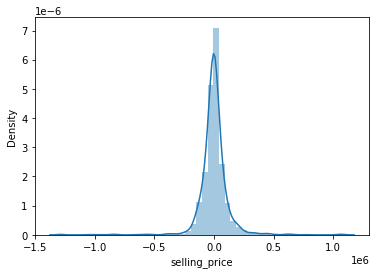

In [198]:
sns.distplot(Y_test-predictions)

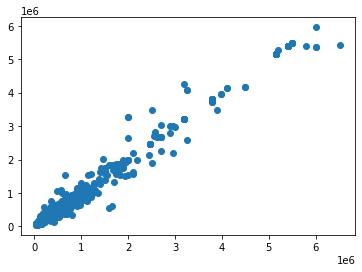

In [199]:
plt.scatter(Y_test,predictions)

In [200]:
import pickle 
#open file
file = open('random_forest_regression_model.pkl','wb')

#dump information in that file
pickle.dump(rf_random,file)

In [203]:
X.dtypes


km_driven                         int64
seats                           float64
year_code                         int64
mileage_nu                      float64
engine_nu                       float64
max_power_nu                    float64
brand_code                      float64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object